# TCC - BASE 2 - Rede Neural
===================================================================================================================

Avaliação de técnicas de predição na determinação de preços de bens industriais - TCC

Alunos: Adriano Gonçalves da Silva / Fernando Nahid Leitão / Leonardo Carmo de Holanda

Matrícula: 192.671.008 / 192.671.055 / 192.671.058

E-mail: adrianogo@yahoo.com.br / fernando_nahid@hotmail.com / carmodeholanda@gmail.com

===================================================================================================================

## <font color='blue'>Pré-processamento - 20 classes</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE2_ETAPA3_v1.csv*

In [112]:
data = pd.read_csv('BASE2_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

MATERIAL_CORPO    MATERIAL_INTERNOS  ... id   VALOR
0   AC ASTM A105  OBTUR-SEDE AISI 410  ...  1  229.24
1   AC ASTM A105  OBTUR-SEDE AISI 410  ...  2  252.58
2   AC ASTM A105  OBTUR-SEDE AISI 410  ...  3  262.71
3   AC ASTM A105  OBTUR-SEDE AISI 410  ...  4  252.58
4   AC ASTM A105  OBTUR-SEDE AISI 410  ...  5  252.59

[5 rows x 16 columns]

*Análise exploratória da base*

In [113]:
data.shape

(5746, 16)

In [114]:
data.columns

Index(['MATERIAL_CORPO', 'MATERIAL_INTERNOS', 'ACABAMENTO_FACE_FLANGE',
       'ADAPTA_CORPO_TAMPA', 'CLASSE_MATERIAL_CORPO', 'DIAMETRO_NOMINAL',
       'EXTREMIDADE_CONEX', 'FAIXA_DIAMETRO_PGBF', 'FORMA_CONSTRUTIVA_HASTE',
       'PADRAO_FABRICA', 'REQUISITOS_SUPLEMENT', 'TIPO_ACIONADOR',
       'TIPO_OBTURADOR', 'CLASSE_PRESSAO', 'id', 'VALOR'],
      dtype='object')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MATERIAL_CORPO           5746 non-null   object 
 1   MATERIAL_INTERNOS        5746 non-null   object 
 2   ACABAMENTO_FACE_FLANGE   5746 non-null   object 
 3   ADAPTA_CORPO_TAMPA       5746 non-null   object 
 4   CLASSE_MATERIAL_CORPO    5746 non-null   object 
 5   DIAMETRO_NOMINAL         5746 non-null   float64
 6   EXTREMIDADE_CONEX        5746 non-null   object 
 7   FAIXA_DIAMETRO_PGBF      5746 non-null   object 
 8   FORMA_CONSTRUTIVA_HASTE  5746 non-null   object 
 9   PADRAO_FABRICA           5746 non-null   object 
 10  REQUISITOS_SUPLEMENT     5746 non-null   object 
 11  TIPO_ACIONADOR           5746 non-null   object 
 12  TIPO_OBTURADOR           5746 non-null   object 
 13  CLASSE_PRESSAO           5746 non-null   int64  
 14  id                      

In [116]:
data.isnull().sum()

MATERIAL_CORPO             0
MATERIAL_INTERNOS          0
ACABAMENTO_FACE_FLANGE     0
ADAPTA_CORPO_TAMPA         0
CLASSE_MATERIAL_CORPO      0
DIAMETRO_NOMINAL           0
EXTREMIDADE_CONEX          0
FAIXA_DIAMETRO_PGBF        0
FORMA_CONSTRUTIVA_HASTE    0
PADRAO_FABRICA             0
REQUISITOS_SUPLEMENT       0
TIPO_ACIONADOR             0
TIPO_OBTURADOR             0
CLASSE_PRESSAO             0
id                         0
VALOR                      0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 20 classes</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [117]:
data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [118]:
data = pd.get_dummies(data, drop_first=True)

In [119]:
data.head()

DIAMETRO_NOMINAL  ...  TIPO_OBTURADOR_OBTURADOR CUNHA INTEIRIÇA
0              0.75  ...                                         1
1              0.75  ...                                         1
2              0.75  ...                                         1
3              0.75  ...                                         1
4              0.75  ...                                         1

[5 rows x 104 columns]

*Visualização de histograma*

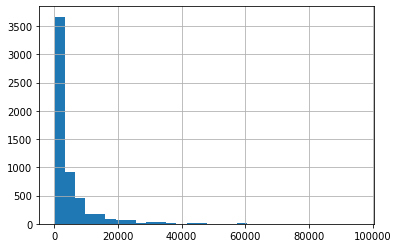

In [120]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [121]:
data.head()

DIAMETRO_NOMINAL  ...  TIPO_OBTURADOR_OBTURADOR CUNHA INTEIRIÇA
0              0.75  ...                                         1
1              0.75  ...                                         1
2              0.75  ...                                         1
3              0.75  ...                                         1
4              0.75  ...                                         1

[5 rows x 104 columns]

In [122]:
data.shape

(5746, 104)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [123]:
kmeans = KMeans(n_clusters=20, random_state=seed)
kmeans = kmeans.fit(data)

In [124]:
kmeans.labels_

array([ 4,  4,  4, ...,  9, 17, 15], dtype=int32)

In [125]:
data['labels'] = kmeans.labels_

In [126]:
data.head()

DIAMETRO_NOMINAL  ...  labels
0              0.75  ...       4
1              0.75  ...       4
2              0.75  ...       4
3              0.75  ...       4
4              0.75  ...       4

[5 rows x 105 columns]

In [127]:
data['labels'] = data['labels'].astype('category')

In [128]:
data = data.drop(columns=['VALOR'])

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Columns: 104 entries, DIAMETRO_NOMINAL to labels
dtypes: category(1), float64(1), int64(1), uint8(101)
memory usage: 663.0 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [130]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 20 classes</font>
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4596, 103)
(1150, 103)
(4596,)
(1150,)


*Normalizando os Dados*

In [132]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[ 0.42038448, -1.04395371,  1.29429661, -0.01475222, -0.01475222,
        -0.02951407, -0.04429522, -0.12792357, -0.02951407, -0.03615508,
        -0.11789012, -0.03300132, -0.02555715, -0.02086505, -0.01475222,
        -0.02555715, -0.03615508, -0.02555715, -0.06935268, -0.03615508,
        -0.08373406, -0.01475222, -0.02555715, -0.01475222, -0.149898  ,
        -0.01475222, -0.13726918, -0.08633002, -0.02951407, -0.01475222,
        -0.01475222, -0.16019961,  0.        , -0.06611074, -0.01475222,
        -0.01475222, -0.08373406, -0.02086505, -0.30535967, -0.12526216,
        -0.04669635, -0.06775075, -0.06093112, -0.01475222, -0.25759912,
        -0.26236846, -0.44054101, -0.01475222, -0.03300132, -0.19236322,
        -0.04898089, -0.02086505, -0.01475222, -0.02951407, -0.02555715,
        -0.02086505, -0.02086505, -0.04429522, -0.62634285, -0.01475222,
         1.90239204, -0.03615508, -0.03615508, -0.08373406, -0.06270445,
        -0.01475222, -0.35911132, -0.17984719,  1.1

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [133]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(104,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(20,activation = 'sigmoid'))
RN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 104)               10816     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2100      
Total params: 12,916
Trainable params: 12,916
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [134]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
144/144 [==============================] - 0s 963us/step - loss: 0.6031 - accuracy: 0.1484
Epoch 2/500
144/144 [==============================] - 0s 930us/step - loss: 0.3928 - accuracy: 0.1678
Epoch 3/500
144/144 [==============================] - 0s 869us/step - loss: 0.3007 - accuracy: 0.1987
Epoch 4/500
144/144 [==============================] - 0s 952us/step - loss: 0.2542 - accuracy: 0.3172
Epoch 5/500
144/144 [==============================] - 0s 826us/step - loss: 0.2275 - accuracy: 0.3177
Epoch 6/500
144/144 [==============================] - 0s 970us/step - loss: 0.2106 - accuracy: 0.3122
Epoch 7/500
144/144 [==============================] - 0s 870us/step - loss: 0.1990 - accuracy: 0.3118
Epoch 8/500
144/144 [==============================] - 0s 924us/step - loss: 0.1907 - accuracy: 0.3116
Epoch 9/500
144/144 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.3116
Epoch 10/500
144/144 [==============================] - 0s 998us/step - los

*Teste da rede neural*

In [135]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.10416246950626373
Test mape: 0.5286956429481506


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [136]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [137]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

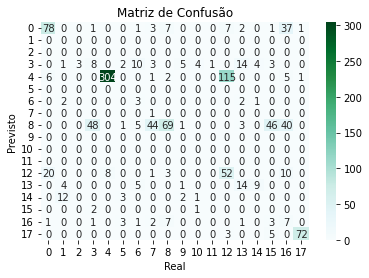

In [138]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()

## <font color='blue'>Pré-processamento - 10 classes</font> - Só foi possível fazer com 9 classes
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE2_ETAPA3_v1.csv*

In [329]:
data = pd.read_csv('BASE2_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

MATERIAL_CORPO    MATERIAL_INTERNOS  ... id   VALOR
0   AC ASTM A105  OBTUR-SEDE AISI 410  ...  1  229.24
1   AC ASTM A105  OBTUR-SEDE AISI 410  ...  2  252.58
2   AC ASTM A105  OBTUR-SEDE AISI 410  ...  3  262.71
3   AC ASTM A105  OBTUR-SEDE AISI 410  ...  4  252.58
4   AC ASTM A105  OBTUR-SEDE AISI 410  ...  5  252.59

[5 rows x 16 columns]

*Análise exploratória da base*

In [330]:
data.shape

(5746, 16)

In [331]:
data.columns

Index(['MATERIAL_CORPO', 'MATERIAL_INTERNOS', 'ACABAMENTO_FACE_FLANGE',
       'ADAPTA_CORPO_TAMPA', 'CLASSE_MATERIAL_CORPO', 'DIAMETRO_NOMINAL',
       'EXTREMIDADE_CONEX', 'FAIXA_DIAMETRO_PGBF', 'FORMA_CONSTRUTIVA_HASTE',
       'PADRAO_FABRICA', 'REQUISITOS_SUPLEMENT', 'TIPO_ACIONADOR',
       'TIPO_OBTURADOR', 'CLASSE_PRESSAO', 'id', 'VALOR'],
      dtype='object')

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MATERIAL_CORPO           5746 non-null   object 
 1   MATERIAL_INTERNOS        5746 non-null   object 
 2   ACABAMENTO_FACE_FLANGE   5746 non-null   object 
 3   ADAPTA_CORPO_TAMPA       5746 non-null   object 
 4   CLASSE_MATERIAL_CORPO    5746 non-null   object 
 5   DIAMETRO_NOMINAL         5746 non-null   float64
 6   EXTREMIDADE_CONEX        5746 non-null   object 
 7   FAIXA_DIAMETRO_PGBF      5746 non-null   object 
 8   FORMA_CONSTRUTIVA_HASTE  5746 non-null   object 
 9   PADRAO_FABRICA           5746 non-null   object 
 10  REQUISITOS_SUPLEMENT     5746 non-null   object 
 11  TIPO_ACIONADOR           5746 non-null   object 
 12  TIPO_OBTURADOR           5746 non-null   object 
 13  CLASSE_PRESSAO           5746 non-null   int64  
 14  id                      

In [333]:
data.isnull().sum()

MATERIAL_CORPO             0
MATERIAL_INTERNOS          0
ACABAMENTO_FACE_FLANGE     0
ADAPTA_CORPO_TAMPA         0
CLASSE_MATERIAL_CORPO      0
DIAMETRO_NOMINAL           0
EXTREMIDADE_CONEX          0
FAIXA_DIAMETRO_PGBF        0
FORMA_CONSTRUTIVA_HASTE    0
PADRAO_FABRICA             0
REQUISITOS_SUPLEMENT       0
TIPO_ACIONADOR             0
TIPO_OBTURADOR             0
CLASSE_PRESSAO             0
id                         0
VALOR                      0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 10 classes</font> - Só foi possível fazer com 9 classes
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [334]:
data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [335]:
data = pd.get_dummies(data, drop_first=True)

In [336]:
data.head()

DIAMETRO_NOMINAL  ...  TIPO_OBTURADOR_OBTURADOR CUNHA INTEIRIÇA
0              0.75  ...                                         1
1              0.75  ...                                         1
2              0.75  ...                                         1
3              0.75  ...                                         1
4              0.75  ...                                         1

[5 rows x 104 columns]

*Visualização de histograma*

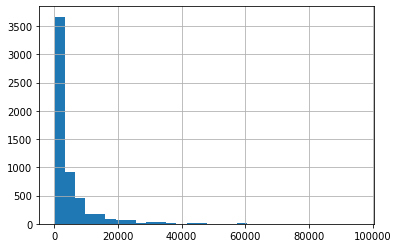

In [337]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [338]:
data.head()

DIAMETRO_NOMINAL  ...  TIPO_OBTURADOR_OBTURADOR CUNHA INTEIRIÇA
0              0.75  ...                                         1
1              0.75  ...                                         1
2              0.75  ...                                         1
3              0.75  ...                                         1
4              0.75  ...                                         1

[5 rows x 104 columns]

In [339]:
data.shape

(5746, 104)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [340]:
kmeans = KMeans(n_clusters=9, random_state=seed)
kmeans = kmeans.fit(data)

In [341]:
kmeans.labels_

array([8, 8, 8, ..., 0, 7, 4], dtype=int32)

In [342]:
data['labels'] = kmeans.labels_

In [343]:
data.head()

DIAMETRO_NOMINAL  ...  labels
0              0.75  ...       8
1              0.75  ...       8
2              0.75  ...       8
3              0.75  ...       8
4              0.75  ...       8

[5 rows x 105 columns]

In [344]:
data['labels'] = data['labels'].astype('category')

In [345]:
data = data.drop(columns=['VALOR'])

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Columns: 104 entries, DIAMETRO_NOMINAL to labels
dtypes: category(1), float64(1), int64(1), uint8(101)
memory usage: 662.6 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [347]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 10 classes</font> - Só foi possível fazer com 9 classes
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4596, 103)
(1150, 103)
(4596,)
(1150,)


*Normalizando os Dados*

In [349]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[ 0.42038448, -1.04395371,  1.29429661, -0.01475222, -0.01475222,
        -0.02951407, -0.04429522, -0.12792357, -0.02951407, -0.03615508,
        -0.11789012, -0.03300132, -0.02555715, -0.02086505, -0.01475222,
        -0.02555715, -0.03615508, -0.02555715, -0.06935268, -0.03615508,
        -0.08373406, -0.01475222, -0.02555715, -0.01475222, -0.149898  ,
        -0.01475222, -0.13726918, -0.08633002, -0.02951407, -0.01475222,
        -0.01475222, -0.16019961,  0.        , -0.06611074, -0.01475222,
        -0.01475222, -0.08373406, -0.02086505, -0.30535967, -0.12526216,
        -0.04669635, -0.06775075, -0.06093112, -0.01475222, -0.25759912,
        -0.26236846, -0.44054101, -0.01475222, -0.03300132, -0.19236322,
        -0.04898089, -0.02086505, -0.01475222, -0.02951407, -0.02555715,
        -0.02086505, -0.02086505, -0.04429522, -0.62634285, -0.01475222,
         1.90239204, -0.03615508, -0.03615508, -0.08373406, -0.06270445,
        -0.01475222, -0.35911132, -0.17984719,  1.1

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [350]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(104,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(9,activation = 'sigmoid'))
RN.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 104)               10816     
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 945       
Total params: 11,761
Trainable params: 11,761
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [351]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
144/144 [==============================] - 1s 1ms/step - loss: 0.5766 - accuracy: 0.0940
Epoch 2/500
144/144 [==============================] - 0s 890us/step - loss: 0.3366 - accuracy: 0.5200
Epoch 3/500
144/144 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.5257
Epoch 4/500
144/144 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.5302
Epoch 5/500
144/144 [==============================] - 0s 917us/step - loss: 0.2442 - accuracy: 0.5329
Epoch 6/500
144/144 [==============================] - 0s 963us/step - loss: 0.2353 - accuracy: 0.5335
Epoch 7/500
144/144 [==============================] - 0s 849us/step - loss: 0.2285 - accuracy: 0.5337
Epoch 8/500
144/144 [==============================] - 0s 958us/step - loss: 0.2230 - accuracy: 0.5348
Epoch 9/500
144/144 [==============================] - 0s 951us/step - loss: 0.2183 - accuracy: 0.5352
Epoch 10/500
144/144 [==============================] - 0s 996us/step - loss: 0

*Teste da rede neural*

In [352]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.11756167560815811
Test mape: 0.7860869765281677


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [353]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [354]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

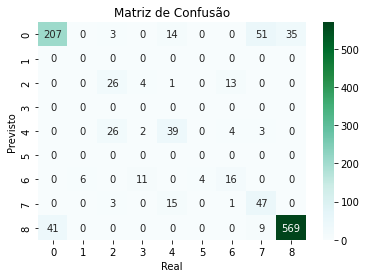

In [355]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()

## <font color='blue'>Pré-processamento - 5 classes</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE2_ETAPA3_v1.csv*

In [190]:
data = pd.read_csv('BASE2_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

MATERIAL_CORPO    MATERIAL_INTERNOS  ... id   VALOR
0   AC ASTM A105  OBTUR-SEDE AISI 410  ...  1  229.24
1   AC ASTM A105  OBTUR-SEDE AISI 410  ...  2  252.58
2   AC ASTM A105  OBTUR-SEDE AISI 410  ...  3  262.71
3   AC ASTM A105  OBTUR-SEDE AISI 410  ...  4  252.58
4   AC ASTM A105  OBTUR-SEDE AISI 410  ...  5  252.59

[5 rows x 16 columns]

*Análise exploratória da base*

In [191]:
data.shape

(5746, 16)

In [192]:
data.columns

Index(['MATERIAL_CORPO', 'MATERIAL_INTERNOS', 'ACABAMENTO_FACE_FLANGE',
       'ADAPTA_CORPO_TAMPA', 'CLASSE_MATERIAL_CORPO', 'DIAMETRO_NOMINAL',
       'EXTREMIDADE_CONEX', 'FAIXA_DIAMETRO_PGBF', 'FORMA_CONSTRUTIVA_HASTE',
       'PADRAO_FABRICA', 'REQUISITOS_SUPLEMENT', 'TIPO_ACIONADOR',
       'TIPO_OBTURADOR', 'CLASSE_PRESSAO', 'id', 'VALOR'],
      dtype='object')

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MATERIAL_CORPO           5746 non-null   object 
 1   MATERIAL_INTERNOS        5746 non-null   object 
 2   ACABAMENTO_FACE_FLANGE   5746 non-null   object 
 3   ADAPTA_CORPO_TAMPA       5746 non-null   object 
 4   CLASSE_MATERIAL_CORPO    5746 non-null   object 
 5   DIAMETRO_NOMINAL         5746 non-null   float64
 6   EXTREMIDADE_CONEX        5746 non-null   object 
 7   FAIXA_DIAMETRO_PGBF      5746 non-null   object 
 8   FORMA_CONSTRUTIVA_HASTE  5746 non-null   object 
 9   PADRAO_FABRICA           5746 non-null   object 
 10  REQUISITOS_SUPLEMENT     5746 non-null   object 
 11  TIPO_ACIONADOR           5746 non-null   object 
 12  TIPO_OBTURADOR           5746 non-null   object 
 13  CLASSE_PRESSAO           5746 non-null   int64  
 14  id                      

In [194]:
data.isnull().sum()

MATERIAL_CORPO             0
MATERIAL_INTERNOS          0
ACABAMENTO_FACE_FLANGE     0
ADAPTA_CORPO_TAMPA         0
CLASSE_MATERIAL_CORPO      0
DIAMETRO_NOMINAL           0
EXTREMIDADE_CONEX          0
FAIXA_DIAMETRO_PGBF        0
FORMA_CONSTRUTIVA_HASTE    0
PADRAO_FABRICA             0
REQUISITOS_SUPLEMENT       0
TIPO_ACIONADOR             0
TIPO_OBTURADOR             0
CLASSE_PRESSAO             0
id                         0
VALOR                      0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 5 classes</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [195]:
data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [196]:
data = pd.get_dummies(data, drop_first=True)

In [197]:
data.head()

DIAMETRO_NOMINAL  ...  TIPO_OBTURADOR_OBTURADOR CUNHA INTEIRIÇA
0              0.75  ...                                         1
1              0.75  ...                                         1
2              0.75  ...                                         1
3              0.75  ...                                         1
4              0.75  ...                                         1

[5 rows x 104 columns]

*Visualização de histograma*

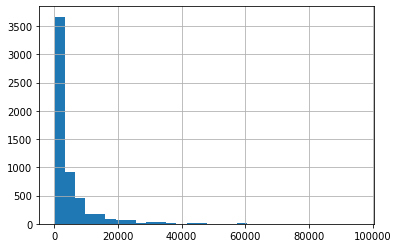

In [198]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [199]:
data.head()

DIAMETRO_NOMINAL  ...  TIPO_OBTURADOR_OBTURADOR CUNHA INTEIRIÇA
0              0.75  ...                                         1
1              0.75  ...                                         1
2              0.75  ...                                         1
3              0.75  ...                                         1
4              0.75  ...                                         1

[5 rows x 104 columns]

In [200]:
data.shape

(5746, 104)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [201]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans = kmeans.fit(data)

In [202]:
kmeans.labels_

array([0, 0, 0, ..., 0, 3, 2], dtype=int32)

In [203]:
data['labels'] = kmeans.labels_

In [204]:
data.head()

DIAMETRO_NOMINAL  ...  labels
0              0.75  ...       0
1              0.75  ...       0
2              0.75  ...       0
3              0.75  ...       0
4              0.75  ...       0

[5 rows x 105 columns]

In [205]:
data['labels'] = data['labels'].astype('category')

In [206]:
data = data.drop(columns=['VALOR'])

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Columns: 104 entries, DIAMETRO_NOMINAL to labels
dtypes: category(1), float64(1), int64(1), uint8(101)
memory usage: 662.5 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [208]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 5 classes</font>
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4596, 103)
(1150, 103)
(4596,)
(1150,)


*Normalizando os Dados*

In [210]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[ 0.42038448, -1.04395371,  1.29429661, -0.01475222, -0.01475222,
        -0.02951407, -0.04429522, -0.12792357, -0.02951407, -0.03615508,
        -0.11789012, -0.03300132, -0.02555715, -0.02086505, -0.01475222,
        -0.02555715, -0.03615508, -0.02555715, -0.06935268, -0.03615508,
        -0.08373406, -0.01475222, -0.02555715, -0.01475222, -0.149898  ,
        -0.01475222, -0.13726918, -0.08633002, -0.02951407, -0.01475222,
        -0.01475222, -0.16019961,  0.        , -0.06611074, -0.01475222,
        -0.01475222, -0.08373406, -0.02086505, -0.30535967, -0.12526216,
        -0.04669635, -0.06775075, -0.06093112, -0.01475222, -0.25759912,
        -0.26236846, -0.44054101, -0.01475222, -0.03300132, -0.19236322,
        -0.04898089, -0.02086505, -0.01475222, -0.02951407, -0.02555715,
        -0.02086505, -0.02086505, -0.04429522, -0.62634285, -0.01475222,
         1.90239204, -0.03615508, -0.03615508, -0.08373406, -0.06270445,
        -0.01475222, -0.35911132, -0.17984719,  1.1

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [211]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(104,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(5,activation = 'sigmoid'))
RN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 104)               10816     
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 525       
Total params: 11,341
Trainable params: 11,341
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [212]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
144/144 [==============================] - 1s 966us/step - loss: 0.4365 - accuracy: 0.6295
Epoch 2/500
144/144 [==============================] - 0s 948us/step - loss: 0.3140 - accuracy: 0.7124
Epoch 3/500
144/144 [==============================] - 0s 931us/step - loss: 0.2900 - accuracy: 0.7124
Epoch 4/500
144/144 [==============================] - 0s 931us/step - loss: 0.2770 - accuracy: 0.7124
Epoch 5/500
144/144 [==============================] - 0s 842us/step - loss: 0.2674 - accuracy: 0.7124
Epoch 6/500
144/144 [==============================] - 0s 898us/step - loss: 0.2594 - accuracy: 0.7124
Epoch 7/500
144/144 [==============================] - 0s 923us/step - loss: 0.2523 - accuracy: 0.7124
Epoch 8/500
144/144 [==============================] - 0s 952us/step - loss: 0.2460 - accuracy: 0.7124
Epoch 9/500
144/144 [==============================] - 0s 894us/step - loss: 0.2402 - accuracy: 0.7124
Epoch 10/500
144/144 [==============================] - 0s 917us/step - l

*Teste da rede neural*

In [213]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.10095150023698807
Test mape: 0.9034782648086548


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [214]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [215]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

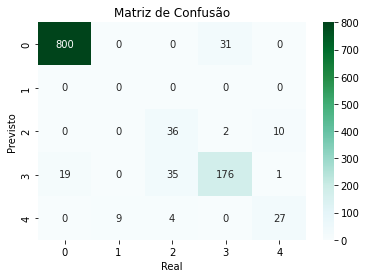

In [216]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()